## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [2]:
df_train = pd.read_csv('Titanic_train.csv')

## 觀察 Age

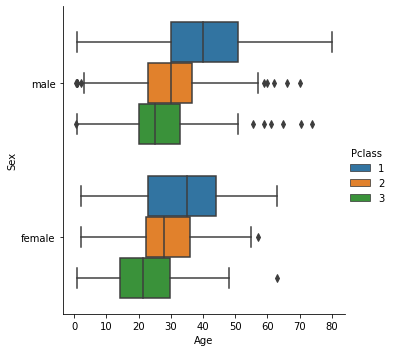

In [3]:
sns.catplot(data=df_train, x='Age', y='Sex', kind='box', orient='h', hue='Pclass')

In [4]:
from sklearn import preprocessing
df_train['Sex'] = preprocessing.LabelEncoder().fit_transform(df_train['Sex'])
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [5]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=15, weights='uniform')
df_filled = pd.DataFrame(imputer.fit_transform(df_train.loc[:, ['Pclass', 'Sex', 'Age']]))
df_filled[2] = df_filled[2].round()
display(df_filled)

,0,1,2
0,3.0,1.0,22.0
1,1.0,0.0,38.0
2,3.0,0.0,26.0
3,1.0,0.0,35.0
4,3.0,1.0,35.0
...,...,...,...
886,2.0,1.0,27.0
887,1.0,0.0,19.0
888,3.0,0.0,18.0
889,1.0,1.0,26.0


In [6]:
for i in np.where(df_train['Age'].isnull()):
    df_train.iloc[i, 5] = df_filled.iloc[i, 2]

df_train['Age'].isnull().sum()

0